In [1]:
import numpy as np
import pickle
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from layers import SinkhornDistance
from torch.autograd import Variable


In [2]:
a = Variable(torch.zeros(2,10), requires_grad = True)
b = torch.zeros(a.size())
a.data[0][3:7] = 1
b.data[0][3:5] = 1
a.data[1][1:3] = 1
b.data[1][8:] = 1

In [3]:
a,b

(tensor([[0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
         [0., 1., 1., 0., 0., 0., 0., 0., 0., 0.]], requires_grad=True),
 tensor([[0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]]))

In [4]:
sinkhorn = SinkhornDistance(eps=1e-5, max_iter=100, reduction=None)

In [5]:
dist, P, C = sinkhorn(a,b)

In [6]:
dist.backward()

In [7]:
a.grad

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          7.9688e-01,  7.9688e-01,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  9.1923e+01,  9.1923e+01,  7.9641e+03,  7.9641e+03,
          0.0000e+00,  0.0000e+00,  0.0000e+00, -8.0561e+03, -8.0561e+03]])

<Figure size 432x288 with 0 Axes>

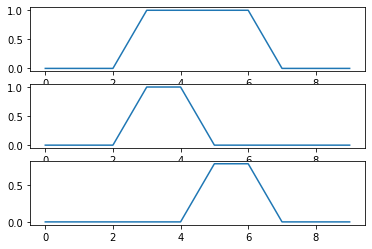

<Figure size 432x288 with 0 Axes>

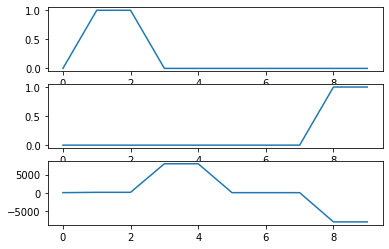

In [8]:
for i in range(len(a)):
    plt.figure()
    fig, ax = plt.subplots(3,1)
    ax[0].plot(a[i].detach().numpy())
    ax[1].plot(b[i].detach().numpy())
    ax[2].plot(a.grad[i].numpy())

In [9]:
z = torch.rand(3,2,10)

In [10]:
z

tensor([[[0.0541, 0.8526, 0.0328, 0.7314, 0.2923, 0.1854, 0.8259, 0.7944,
          0.9917, 0.4204],
         [0.1133, 0.0728, 0.3538, 0.3312, 0.0096, 0.9699, 0.7714, 0.3285,
          0.6758, 0.8822]],

        [[0.8963, 0.5330, 0.9803, 0.0854, 0.7279, 0.4254, 0.6091, 0.2677,
          0.6681, 0.8743],
         [0.5331, 0.2657, 0.2022, 0.3054, 0.3139, 0.3064, 0.0840, 0.0546,
          0.4873, 0.8730]],

        [[0.2157, 0.5864, 0.1586, 0.8958, 0.3286, 0.7943, 0.8259, 0.3418,
          0.3424, 0.1161],
         [0.9662, 0.7801, 0.1004, 0.0676, 0.9336, 0.2239, 0.1077, 0.5718,
          0.3814, 0.9051]]])

In [18]:
torch.sum(F.softmax(z, dim=2)[0][0])

tensor(1.0000)